In this jupyter notebook we will use ensemble techniques to predict the quality of different kinds of wine. The objective of the project is to analyze if the combination of different algorithms is more precise than the individual ones. We will use Linear Regression and a Decision Tree as the algorithms used.

The first step is to import the data (stored in a csv file) and the required modules for the analysis.   

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [4]:
wine=pd.read_csv(r'C:\Users\Usuario\Desktop\Data Science\winequality.csv')



Is time to have a look on the data. We will need to check that the data is clean and see some descriptive statistics that give us more information about the dataset. Graphs would also be useful in order to have a clearer impression.

In [5]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good                      int64
color                    object
dtype: object

It is important to know the datatypes we are dealing with. As we can see from the previous image we are working mainly with float64 data. We need to create a dummy variable with the color field to proceed with the analysis.

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In the previous image we can see the descriptive statistics for the different variables. This information would be useful when analyzing the key drivers of wine quality

Now is time to see if the data is complete and clean. 

In [7]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

The data is complete and there are no missing values. Great news taking into account that in most cases is mandatory to perform some data cleaning and engineering tasks. However, we need to create a dummy variable for the color field.

In [8]:
wine=pd.get_dummies(wine,columns=["color"],drop_first=True)
X=wine.drop(["quality"],axis=1)
y=wine["quality"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In the previous step first we created a dummy variable for the color field.Then we proceed to prepare the dataset for
the analysis being X the independent variables and y the dependent one (Quality in this case). Finally we divided the dataset
into a train set and a test set in order to see the accuracy of the models in unseen data.


In the next step we will create the two models. The linear regression (LR) and the decision tree (DT). The decision tree would have a minimum of 10% of the data in each leaf. We will fit both models to the training data and predict on the unseen data.
The metrics used to check the accuracy are the mean squared error (MSE) and the mean absolute error (MAE).

In [9]:
lr=LinearRegression()
dt=DecisionTreeRegressor(random_state=1,min_samples_leaf=0.1)

regressors=[('LR',lr),('DT',dt)]
for rg_name,rg in regressors:
    rg.fit(X_train,y_train)
    y_pred=rg.predict(X_test)
    print(rg_name,'MSE:',MSE(y_test,y_pred))
    print(rg_name,'MAE:',MAE(y_test,y_pred))
    




LR MSE: 0.2747389001688195
LR MAE: 0.4277326181357581
DT MSE: 0.28705454220422844
DT MAE: 0.42813147541629715


As we see from the previous results both models have similar results. Taking into account the results we can tell that the models
are not having big mistakes as the MSE is smaller than the MAE. In general terms the models prediction are accurate. 

Now is time to use the ensamble technique. Our model would combine both previously used algorithms (LR & DT) and make a prediction.
What this algorithm does is to combine the predictions of the other two and then make the average.

In [10]:
vr=VotingRegressor(estimators=regressors)
vr.fit(X_train,y_train)
vr_pred=vr.predict(X_test) 
print('VR MSE',MSE(y_test,vr_pred))
print('VR MAE',MAE(y_test,vr_pred))


VR MSE 0.2732263172076534
VR MAE 0.42501291639753896


The results of this method are almost the same to the individual ones. We can say that in this case it does not worth
to use the voting regressor ensemble methodd.

In this final part of the analysis our focus is to understand which are the main drivers of wine quality. With that objective
in mind we will explore the coeficients of the LR model and use some data visualization techniques that will help us to gain more insights.

In [11]:
coeffs = pd.Series(lr.coef_[:], index=X.columns.values)
coeffs.sort_values(ascending = False)

good                     1.439854
sulphates                0.273296
alcohol                  0.134551
residual sugar           0.021954
pH                       0.015952
free sulfur dioxide      0.002788
total sulfur dioxide    -0.000678
fixed acidity           -0.001730
citric acid             -0.067801
color_white             -0.240398
chlorides               -0.325957
volatile acidity        -1.079479
density                -18.103332
dtype: float64

The main drivers of wine quality apart from the opinion on the wine itself (good variable) are the sulphates and the alcohol.
The density and the acidity seem to be the main causes of quality loss.

The next image is a correlation heatmap of the different fields of the dataset. Our focus is on the dependent variable quality.
Alcohol and the opinion (good) variable are the fields more positively correlated with quality.

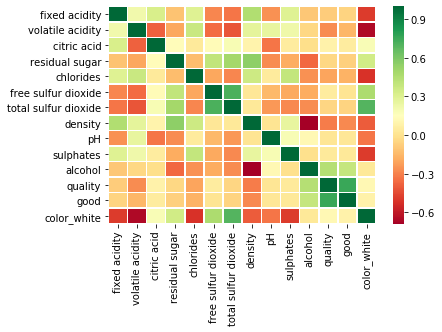

In [21]:
import seaborn as sns
sns.heatmap(wine.corr(),annot=False, linewidths=.5,cmap="RdYlGn")

Finally we can visually see the relation between quality and the main driver of it (sulphates) and also the main driver of
quality loss (density).

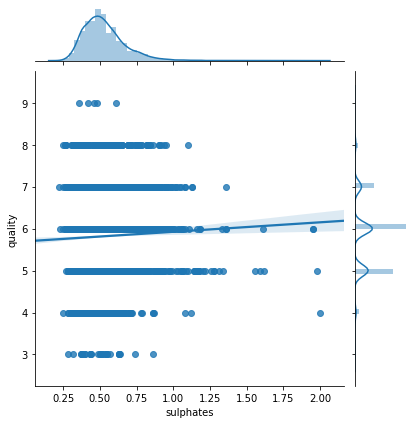

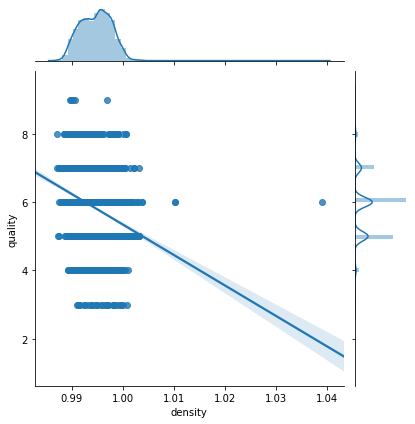

In [27]:
import seaborn as sns
sns.jointplot(wine['sulphates'],y,kind='reg')
sns.jointplot(wine['density'],y,kind='reg')

To conclude we must remark that the ensemble method was not useful in this situation as the accuracy was almost the same as
the individual algorithms. At the same time the opinion of the wine, the sulphates and the alcohol are the main factors of wine quality.
On the other hand density is the main cause of quality loss.